In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn.linear_model as skl_lm
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from functools import reduce
%matplotlib notebook


# NOTES DATA DATABASE

In [53]:
notes = pd.read_csv("data.tsv", sep="\t")
notes.head()

,noteId,participantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary
0,1537142913737428992,60901D57594EB0316B0A395584BB13CD,1655318404027,1377030478167937024,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1,1,0,0,0,0,0,0,1,Forbes has a good rundown of the investigation...
1,1537145358521839617,60901D57594EB0316B0A395584BB13CD,1655318986910,1536848327979016193,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,1,1,0,They are expressing a personal opinion in a st...
2,1537147343715282945,60901D57594EB0316B0A395584BB13CD,1655319460217,1537080831751102467,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,LITTLE_HARM,EASY,0,0,...,1,0,0,0,0,0,0,0,1,Teslas purchased after 12/31/19 are not eligib...
3,1537204430730211328,60901D57594EB0316B0A395584BB13CD,1655333070821,1537196168953974784,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1,1,0,0,0,0,0,0,1,The Jan 6th riots were encouraged by the sitti...
4,1540422295029551104,60901D57594EB0316B0A395584BB13CD,1656100269455,1540087463099736065,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1,1,0,0,0,0,0,0,1,The Committee has been found by numerous court...


#### CHECK IF NOTEID VALUES ARE UNIQUE

In [54]:
print(notes.shape)
print(notes["noteId"].unique().size)

(38867, 22)
38805


#### REMOVE DUPLICATES 

In [55]:
notes.drop_duplicates(inplace = True)
#notes.dropna(inplace = True)

print(notes.shape)
print(notes["noteId"].unique().size)
#62 duplicates


(38805, 22)
38805


#### FILTER COLUMNS TO INCLUDE ONLY NECESSARY ONES

In [56]:
notes = notes[["noteId","participantId"]]
notes.head()

,noteId,participantId
0,1537142913737428992,60901D57594EB0316B0A395584BB13CD
1,1537145358521839617,60901D57594EB0316B0A395584BB13CD
2,1537147343715282945,60901D57594EB0316B0A395584BB13CD
3,1537204430730211328,60901D57594EB0316B0A395584BB13CD
4,1540422295029551104,60901D57594EB0316B0A395584BB13CD


In [57]:
#CHECK FOR NULL VALUES
notes.count() #no null values

noteId           38805
participantId    38805
dtype: int64

# NOTE STATUS HISTORY DATABASE

In [58]:
note_status = pd.read_csv("Ratings.tsv", sep="\t")
note_status.head()

,noteId,participantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus
0,1529283490486812673,14177216A155E0923A846E17A4FCCB96,1653444571503,-1,NaN,-1,NEEDS_MORE_RATINGS,-1,NaN
1,1529288840854347782,113B2B41A5F6F907615CBC913FDB6B8C,1653445847133,-1,NaN,-1,NEEDS_MORE_RATINGS,-1,NaN
2,1529284698874081280,572DE227340A57DD28C9048B2637991E,1653444859604,-1,NaN,-1,NaN,-1,NaN
3,1529288639947034624,572DE227340A57DD28C9048B2637991E,1653445799230,-1,NaN,-1,NaN,-1,NaN
4,1529292633243275264,EB16E513D8C8A76A1B5B614A896DE7EE,1653446751305,-1,NaN,-1,NEEDS_MORE_RATINGS,-1,NaN


In [59]:
#### NUMBER OF DUPLICATES 
uncleandata = note_status.duplicated()
uncleandata[uncleandata == True].count() #no duplicates

0

#### CHECK IF NOTEID VALUES ARE UNIQUE

In [60]:
print(note_status.shape)
print(note_status["noteId"].unique().size) #Makes sense we should only have one status per note

(41687, 9)
41687


#### FILTER COLUMNS TO INCLUDE ONLY NECESSARY ONES

In [61]:
note_status = note_status[["noteId", "mostRecentNonNMRStatus"]]

note_status[5:10]

,noteId,mostRecentNonNMRStatus
5,1529288710612824065,NaN
6,1529294614628380674,CURRENTLY_RATED_HELPFUL
7,1529286044977246208,NaN
8,1529323838990786560,NaN
9,1529322996904644609,CURRENTLY_RATED_NOT_HELPFUL


#### CHECK FOR NULL VALUES

In [62]:
note_status.count()  #There are null values in mostRecentNonNMRStatus

noteId                    41687
mostRecentNonNMRStatus     2524
dtype: int64

#### ONLY NOTES WITH ENOUGH RATINGS WILL RECEIVE A STATUS, WE ARE ONLY INTERESTED IN NOTE IDs WITH A STATUS SO WE WILL DROP ALL OTHER ROWS


In [63]:
note_status.dropna( inplace = True )
print(note_status.shape)
note_status.head()

(2524, 2)


,noteId,mostRecentNonNMRStatus
6,1529294614628380674,CURRENTLY_RATED_HELPFUL
9,1529322996904644609,CURRENTLY_RATED_NOT_HELPFUL
11,1529316859459289088,CURRENTLY_RATED_HELPFUL
13,1529259431648559105,CURRENTLY_RATED_HELPFUL
14,1529264201578844161,CURRENTLY_RATED_HELPFUL


# MERGING NOTES AND NOTES_STATUS DATAFRAMES BASED ON NOTEID

In [64]:
#WE USER "INNER" BECAUSE WE ARE ONLY INTERESTED IN NOTE IDS WITH A MATCHING STATUS
dfs = [notes, note_status]
df = reduce(lambda  left,right: pd.merge(left,right,on=['noteId'],
                                            how='inner'), dfs)

df.head()

,noteId,participantId,mostRecentNonNMRStatus
0,1537147343715282945,60901D57594EB0316B0A395584BB13CD,CURRENTLY_RATED_HELPFUL
1,1535128588818653184,0ECA926338DFB9EFFEBAC1184BAD61F7,CURRENTLY_RATED_HELPFUL
2,1567625460703690752,0ECA926338DFB9EFFEBAC1184BAD61F7,CURRENTLY_RATED_NOT_HELPFUL
3,1534602964295221249,702E5385D7E736DCCDD2279198A222F1,CURRENTLY_RATED_NOT_HELPFUL
4,1536058578469105664,F2C1B194EB06BA309FFF88281581CC09,CURRENTLY_RATED_HELPFUL


#### CHECK IF NOTEID VALUES ARE UNIQUE

In [65]:
print(df.shape)
print(df["noteId"].unique().size)
# print(df['participantId'].unique().size)



(2299, 3)
2299


#### WE WANT TO QUANTIFY THE STATUS TO ANALYZE SO WE WILL CREATE AN ADDITIONAL BOOLEAN COLUMN WHERE 

#### {'CURRENTLY_RATED_HELPFUL':1, 'CURRENTLY_RATED_NOT_HELPFUL':0,}



In [66]:
df = df .dropna(subset=['mostRecentNonNMRStatus'])
Status_to_bool = {'CURRENTLY_RATED_HELPFUL':1,'CURRENTLY_RATED_NOT_HELPFUL':0,}

#CREATE NEW COLUMN TO HOLD VALUES
df["Binary_Status"] = df["mostRecentNonNMRStatus"].map(Status_to_bool)
df.head()


,noteId,participantId,mostRecentNonNMRStatus,Binary_Status
0,1537147343715282945,60901D57594EB0316B0A395584BB13CD,CURRENTLY_RATED_HELPFUL,1
1,1535128588818653184,0ECA926338DFB9EFFEBAC1184BAD61F7,CURRENTLY_RATED_HELPFUL,1
2,1567625460703690752,0ECA926338DFB9EFFEBAC1184BAD61F7,CURRENTLY_RATED_NOT_HELPFUL,0
3,1534602964295221249,702E5385D7E736DCCDD2279198A222F1,CURRENTLY_RATED_NOT_HELPFUL,0
4,1536058578469105664,F2C1B194EB06BA309FFF88281581CC09,CURRENTLY_RATED_HELPFUL,1


#### PLOTTTING AVERAGE HELPFULNESS OF A PARTICIPANT BASED ON THE AVERAGE OF ALL OF THEIR STATUS EVALUATIONS

count    1038.000000
mean        0.556228
std         0.470408
min         0.000000
25%         0.000000
50%         0.861111
75%         1.000000
max         1.000000
Name: Binary_Status, dtype: float64


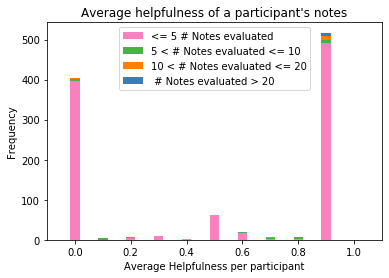

In [17]:
# Average Helpfullness of a participant
Avg_Helpfulness_per_participant = df["Binary_Status"].groupby(df['participantId']).mean()
frequency_of_evaluations = df["Binary_Status"].groupby(df['participantId']).size()

#Because each participant writes a different number of notes.
#We want to show through the visualization that not all notes have 
#the same number of evaluations to calculate the average helpfulness. 
#Therefore, we sectioned our data by it.
five = Avg_Helpfulness_per_participant[frequency_of_evaluations <= 5]
ten = Avg_Helpfulness_per_participant[(frequency_of_evaluations <= 10)&(frequency_of_evaluations > 5)]
twenty = Avg_Helpfulness_per_participant[(frequency_of_evaluations > 10)&(frequency_of_evaluations <= 20)]
more_twenty = Avg_Helpfulness_per_participant[(frequency_of_evaluations > 20)]

fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(five)
b_heights, b_bins = np.histogram(ten)
c_heights, c_bins = np.histogram(twenty)
d_heights, d_bins = np.histogram(more_twenty)

width = (a_bins[1] - a_bins[0])/3


ax.bar(a_bins[:-1], a_heights, width=width, facecolor='#f781bf',label = "<= 5 # Notes evaluated")
ax.bar(b_bins[:-1], b_heights, width=width, facecolor='#4daf4a',label = "5 < # Notes evaluated <= 10", bottom = a_heights)
ax.bar(c_bins[:-1], c_heights, width=width, facecolor= '#ff7f00',label = "10 < # Notes evaluated <= 20", bottom = a_heights + b_heights)
ax.bar(d_bins[:-1], d_heights, width=width, facecolor='#377eb8',label = " # Notes evaluated > 20", bottom = a_heights + b_heights + c_heights)
ax.legend(loc='best')
ax.set_title("Average helpfulness of a participant's notes")  
ax.set_xlabel('Average Helpfulness per participant')  
ax.set_ylabel('Frequency') 
ax.set_xlim([-.1,1.1])
#Avg_Helpfulness_per_participant = completedf_non_null_status["Binary_Status"].groupby(df['participantId']).mean()
print(Avg_Helpfulness_per_participant.describe())
#print()


#### PLOTTING NUMBER OF NOTES WRITTEN BY EACH PARTICIPANT

<IPython.core.display.Javascript object>


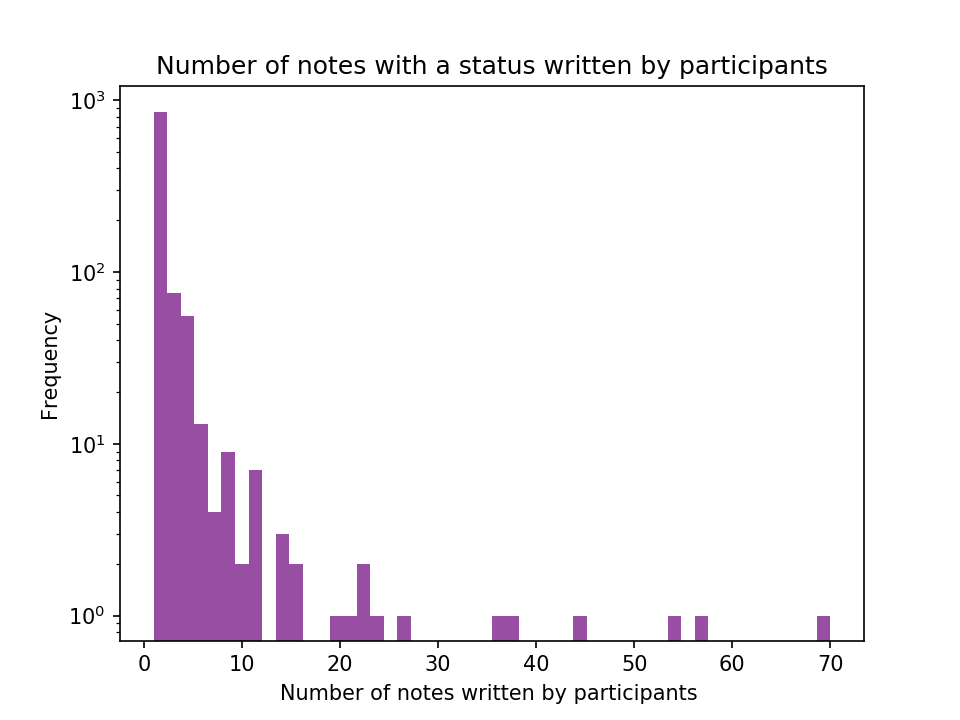

count    1038.000000
mean        2.214836
std         4.439575
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        70.000000
Name: noteId, dtype: float64

In [69]:
plt.figure()
plt.xlabel("Number of notes written by participants ")
df["noteId"].groupby(df['participantId']).size()

df["noteId"].groupby(df['participantId']).size().plot.hist(bins =50, log = True, title = "Number of notes with a status written by participants", color = '#984ea3')
df["noteId"].groupby(df['participantId']).size().describe()


#### AVERAGE HELPFULNESS OF A NOTE
##### (Not too helpful since each note only has one status)
##### WE DECIDED TO GRAPH IT AS A PIE CHART SINCE THE AVERAGE OF ONE DATA POINT WOULD ONLY GIVE US A 1 OR 0

In [ ]:
#COUNT HOW MANY HELPFUL AND NOT HELPFUL EVALUATIONS TO CREATE PIE CHART



In [36]:
helpful = df["Binary_Status"].groupby(df['noteId']).mean().sum()
not_helpful = df["Binary_Status"].groupby(df['noteId']).size().sum() - df["Binary_Status"].groupby(df['noteId']).mean().sum()
print(helpful)
print(not_helpful)

1457
842


The average helpfulness of all noteIds is  0.6337538060026098


<IPython.core.display.Javascript object>


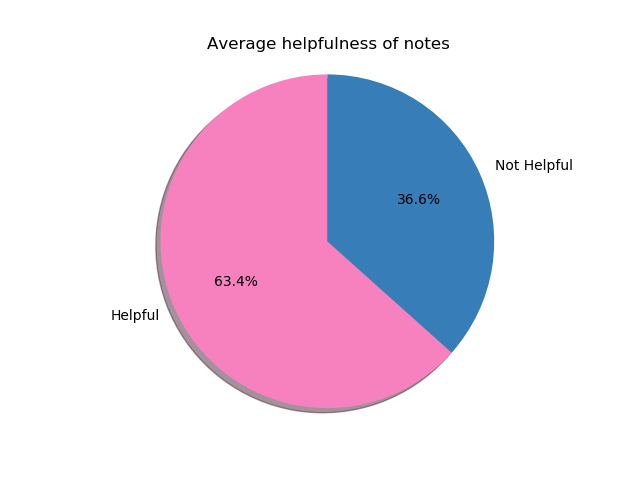

In [51]:
label = ["Helpful", "Not Helpful"]
datatoplot = [1457, 842]



print("The average helpfulness of all noteIds is ", df["Binary_Status"].groupby(df['noteId']).mean().mean())
df["Binary_Status"].groupby(df['noteId']).size().describe()
df["Binary_Status"].groupby(df['noteId']).mean().describe()

fig1, ax1 = plt.subplots()
ax1.pie(datatoplot, labels = label , autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['#f781bf','#377eb8'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Average helpfulness of notes")
plt.show()

#### TO LOOK FURTHER INTO HOW HELPFUL NOTES ARE, WE CAN LOOK AT THE RATINGS DATABASE


# RATINGS DATABASE

In [71]:
ratings = pd.read_csv("Helpful.tsv", sep="\t")
ratings.head()

,noteId,participantId,createdAtMillis,version,agree,disagree,helpful,notHelpful,helpfulnessLevel,helpfulOther,...,notHelpfulOpinionSpeculationOrBias,notHelpfulMissingKeyPoints,notHelpfulOutdated,notHelpfulHardToUnderstand,notHelpfulArgumentativeOrBiased,notHelpfulOffTopic,notHelpfulSpamHarassmentOrAbuse,notHelpfulIrrelevantSources,notHelpfulOpinionSpeculation,notHelpfulNoteNotNeeded
0,1352796878438424576,0466BA47B23AAAB301AA767C4C780E8D,1611523319844,1,1,0,1,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,1352796878438424576,0D7ED07D5421118311EEED5E4ECF2968,1611860252442,1,1,0,1,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,1352796878438424576,628C786C63B5A4D32E13C6C442E1863D,1611623203338,1,0,0,0,1,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,1352796878438424576,EFD7E04E740224D2DDB42A2C910B62C1,1611852744990,1,1,0,1,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,1352796878438424576,3C9A15EEA8FD238754BE28C15B26709A,1611673955881,1,1,0,0,1,NaN,0,...,0,0,0,0,0,0,0,0,0,0


#### CHECK IF NOTE IDS ARE UNIQUE

In [72]:
print(ratings.shape)
print(ratings["noteId"].unique().size) 

#makes sense because  there should be several ratings on one note

(458739, 31)
29099


#### CHECK FOR DUPLICATES 

In [73]:

ratings.drop_duplicates(inplace = True)
print(ratings.shape) 

(456652, 31)


#### FILTER DATABASE TO INCLUDE ONLY NECESSARY COLUMNS

In [74]:
ratings = ratings[["noteId","helpfulnessLevel"]]
ratings.head()

,noteId,helpfulnessLevel
0,1352796878438424576,NaN
1,1352796878438424576,NaN
2,1352796878438424576,NaN
3,1352796878438424576,NaN
4,1352796878438424576,NaN


#### CHECK FOR NULL VALUES

In [75]:
ratings.count()

noteId              456652
helpfulnessLevel    421067
dtype: int64

In [76]:
ratings.dropna(inplace = True)

print(ratings.shape) 
ratings.head()

(421067, 2)


,noteId,helpfulnessLevel
62,1354678831655735296,HELPFUL
63,1354678831655735296,HELPFUL
64,1354678831655735296,NOT_HELPFUL
65,1354678831655735296,HELPFUL
68,1354678831655735296,HELPFUL


#### WE WILL ADD AN ADDITIONAL COLUMN TO QUANTIFY THE HELPFULNESS LEVEL SUCH THAT {'HELPFUL':1,'SOMEWHAT_HELPFUL':0, 'NOT_HELPFUL':-1}

In [77]:
helpfulness_to_bool = {'HELPFUL':1,'SOMEWHAT_HELPFUL':0, 'NOT_HELPFUL':-1}
ratings['helpfulness_codes'] = ratings['helpfulnessLevel'].map(helpfulness_to_bool)
ratings.head()

,noteId,helpfulnessLevel,helpfulness_codes
62,1354678831655735296,HELPFUL,1
63,1354678831655735296,HELPFUL,1
64,1354678831655735296,NOT_HELPFUL,-1
65,1354678831655735296,HELPFUL,1
68,1354678831655735296,HELPFUL,1


#### DIVIDE DF DEPENDING ON NUMBER OF RATINGS PER NOTE

In [78]:
frequence_notes = ratings.groupby(ratings["noteId"]).size()
avg_helpfulness_per_note = ratings.groupby(ratings["noteId"]).mean()
five = avg_helpfulness_per_note[frequence_notes<=5]
ten = avg_helpfulness_per_note[(frequence_notes<=10) & (frequence_notes>5)]
fifteen = avg_helpfulness_per_note[(frequence_notes<=15) & (frequence_notes>10)]
twenty = avg_helpfulness_per_note[(frequence_notes<=20) & (frequence_notes>10)]
more_than_twenty = avg_helpfulness_per_note[(frequence_notes>20)]
five

print(five.mean())
print(ten.mean())
print(fifteen.mean())
print(twenty.mean())


helpfulness_codes    0.183975
dtype: float64
helpfulness_codes    0.140882
dtype: float64
helpfulness_codes    0.174602
dtype: float64
helpfulness_codes    0.180257
dtype: float64


#### PLOTTING AVERAGE HELPFULNESS PER NOTE GIVEN A NUMBER OF RATINGS

<IPython.core.display.Javascript object>


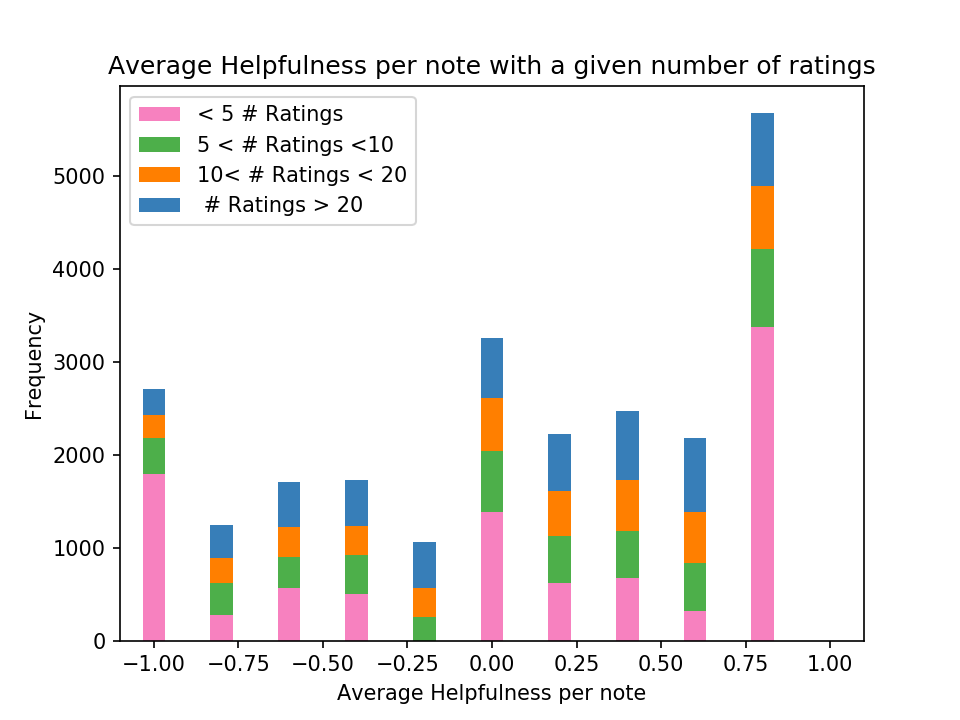

,helpfulness_codes
count,24276.000000
mean,0.171610
std,0.653487
min,-1.000000
25%,-0.333333
50%,0.250000
75%,0.750000
max,1.000000


In [79]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(five)
b_heights, b_bins = np.histogram(ten)
c_heights, c_bins = np.histogram(twenty)
d_heights, d_bins = np.histogram(more_than_twenty)

width = (a_bins[1] - a_bins[0])/3

#ax.bar(a_bins[:-1] - width, a_heights, width=width, facecolor='cornflowerblue',label = "< 5 # Ratings")
#ax.bar(b_bins[:-1], b_heights, width=width, facecolor='seagreen',label = "5 < # Ratings <10", bottom = a_heights)
#ax.bar(c_bins[:-1] + width, c_heights, width=width, facecolor='red',label = "10< # Ratings < 20", bottom = b_heights)
#ax.bar(d_bins[:-1] + (2*width), d_heights, width=width, facecolor='yellow',label = " # Ratings > 20", bottom = c_heights)

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='#f781bf',label = "< 5 # Ratings")
ax.bar(b_bins[:-1], b_heights, width=width, facecolor='#4daf4a',label = "5 < # Ratings <10", bottom = a_heights)
ax.bar(c_bins[:-1], c_heights, width=width, facecolor= '#ff7f00',label = "10< # Ratings < 20", bottom = a_heights +b_heights)
ax.bar(d_bins[:-1], d_heights, width=width, facecolor='#377eb8',label = " # Ratings > 20", bottom = a_heights +b_heights+c_heights)
ax.legend(loc='best')
ax.set_title('Average Helpfulness per note with a given number of ratings')  
ax.set_xlabel('Average Helpfulness per note')  
ax.set_ylabel('Frequency') 
ax.set_xlim([-1.1,1.1])
avg_helpfulness_per_note.describe()

#### PLOTTING THE NUMBER OF RATINGS PER NOTE

In [ ]:
#To understand a little more how the number of ratings per note varies 
# we will explore and plot our data

<IPython.core.display.Javascript object>


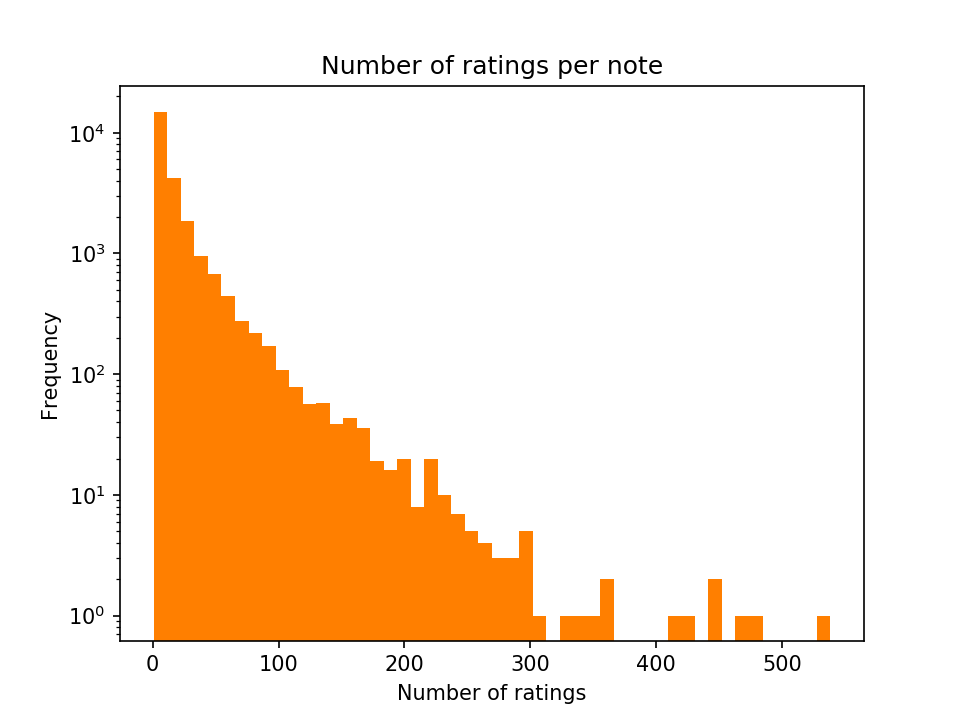

count    24276.000000
mean        17.344991
std         28.286808
min          1.000000
25%          3.000000
50%          8.000000
75%         19.000000
max        538.000000
dtype: float64

In [80]:
plt.figure()
plt.xlabel("Number of ratings")
frequence_notes.plot.hist(bins = 50, color =  '#ff7f00', title = "Number of ratings per note", log = True) 
frequence_notes.describe()